In [ ]:
# default free parameters

default_params = "default_parameters_star"
free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100}

In [483]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import warnings


## Investigate the default 2D grid

In [2]:
default_2D = "2D_default/grid.fits.gz"
hdul_2Dd = fits.open(default_2D)
hdul_2Dd[0].data.shape
#ngrains, naz, ntheta, nrad

(2, 1, 70, 100)

rin: 3

rout: 100

Note that the elbow in the below figures corresponds to the two grid scales.
n_rad_in = 20

139.99642852587345
first: 2.999923500543373, last: 9.925702959792714
first: 0.02142857165809013, last: 0.07089968697278798


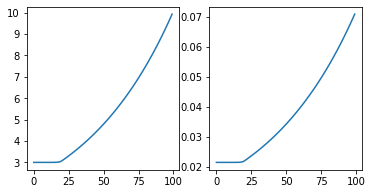

In [3]:
plt.figure(figsize = (6, 3))
# first left / first right
c = hdul_2Dd[0].data[0,0,0,:][0]/hdul_2Dd[0].data[1,0,0,:][0]
print(c)

for i in range(2):
    plt.subplot(1, 2, i+1)
    data = hdul_2Dd[0].data[i,0,0,:]
#     if i == 1:
#         data *= c
    print("first: {first}, last: {last}".format(first = data[0], last = data[-1]))
    plt.plot(data)


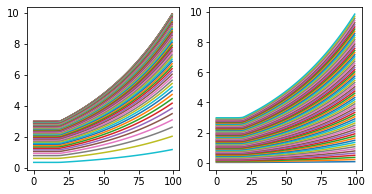

In [4]:
plt.figure(figsize = (6, 3))

for i in range(2):
    plt.subplot(1, 2, i+1)
    for j in range(70):
        data = hdul_2Dd[0].data[i,0,j,:]
        plt.plot(data)

The difference between the two plots above is a scaling factor

c = 140

(coincidently this is the distance in pc -> this actually is a coincidence (see below))

first: 2.999923500543373, last: 0.3579277128727931
first: 0.02142857165809013, last: 2.978571460474528


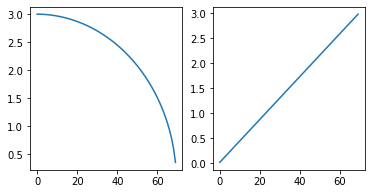

In [5]:
plt.figure(figsize = (6, 3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    data = hdul_2Dd[0].data[i,0,:,0]
    print("first: {first}, last: {last}".format(first = data[0], last = data[-1]))
    plt.plot(data)

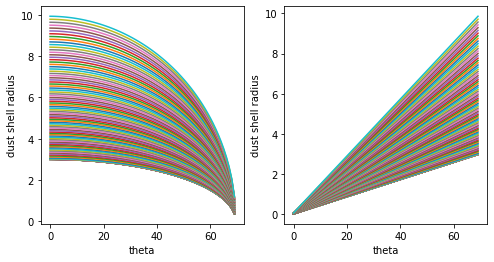

In [6]:
plt.figure(figsize = (8, 4))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.ylabel("dust shell radius")
    plt.xlabel("theta")
    for j in range(100):
        data = hdul_2Dd[0].data[i,0,:,j]
        plt.plot(data)
plt.show()

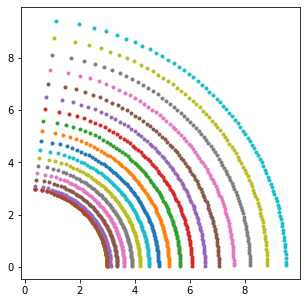

In [7]:
plt.figure(figsize = (5, 5))
for i in range(70):
    for j in range(1, 100, 5):
        plt.scatter(hdul_2Dd[0].data[0, 0, i, j], hdul_2Dd[0].data[1, 0, i, j], marker = '.')
plt.show()

### Extracting the radius

In [86]:
x = hdul_2Dd[0].data[0, 0, :, :]
y = hdul_2Dd[0].data[1, 0, :, :]

r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
r = np.expand_dims(r, axis=0)
r = np.expand_dims(r, axis=0)

print(r[0,0,0,:])

[3.00000003 3.00000011 3.00000024 3.00000049 3.00000101 3.00000204
 3.00000409 3.0000082  3.00001643 3.00003288 3.00006579 3.00013159
 3.00026321 3.00052643 3.00105288 3.00210574 3.00421134 3.00842204
 3.0168415  3.03367268 3.0676386  3.11357612 3.16020154 3.20752518
 3.25555748 3.30430905 3.35379068 3.40401329 3.45498797 3.506726
 3.55923879 3.61253796 3.66663527 3.72154269 3.77727234 3.83383653
 3.89124777 3.94951873 4.0086623  4.06869153 4.12961969 4.19146024
 4.25422685 4.31793337 4.3825939  4.44822271 4.51483431 4.5824434
 4.65106493 4.72071406 4.79140618 4.86315691 4.93598209 5.00989782
 5.08492043 5.1610665  5.23835284 5.31679654 5.39641492 5.47722558
 5.55924636 5.6424954  5.72699108 5.81275208 5.89979733 5.98814608
 6.07781784 6.16883242 6.26120994 6.35497079 6.45013571 6.5467257
 6.64476213 6.74426663 6.8452612  6.94776816 7.05181014 7.15741014
 7.26459148 7.37337786 7.48379329 7.59586219 7.7096093  7.82505976
 7.94223908 8.06117314 8.18188823 8.30441101 8.42876856 8.55498834

#### What happens if you change the distance

139.99642852587345
first: 2.999923500543373, last: 9.925702959792714
first: 0.02142857165809013, last: 0.07089968697278798


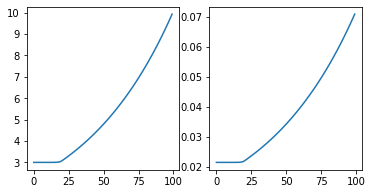

In [8]:
default_2D_50pc = "2D_dist_50pc/grid.fits.gz"
hdul_2Dd_50pc = fits.open(default_2D_50pc)
plt.figure(figsize = (6, 3))
c = 2.999923500543373/0.02142857165809013
print(c)

for i in range(2):
    plt.subplot(1, 2, i+1)
    data = hdul_2Dd_50pc[0].data[i,0,0,:]
#     if i == 1:
#         data *= c
    print("first: {first}, last: {last}".format(first = data[0], last = data[-1]))
    plt.plot(data)

## Investigate the default 3D grid

In [9]:
default_3D = "3D_default/grid.fits.gz"
hdul_3Dd = fits.open(default_3D)
hdul_3Dd[0].data.shape
#ngrains, naz, ntheta, nrad

(3, 1, 140, 100)

rin: 3

rout: 100

first: 0.3579277128727931, last: 1.1842582513886857
first: -2.978571460474528, last: -9.855056489217528
first: 6.2831854820251465, last: 6.2831854820251465


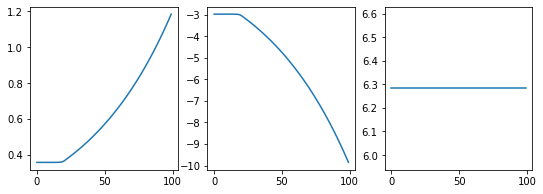

In [10]:
plt.figure(figsize = (9, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    data = hdul_3Dd[0].data[i,0,0,:]
    print("first: {first}, last: {last}".format(first = data[0], last = data[-1]))
    plt.plot(data)

first: 0.3579277128727931, last: 0.3579277128727931
first: -2.978571460474528, last: 2.978571460474528
first: 6.2831854820251465, last: 6.2831854820251465


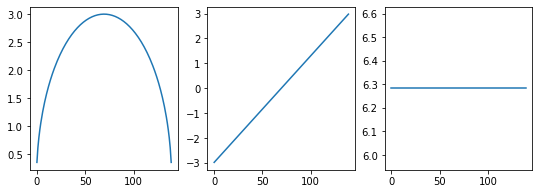

In [11]:
plt.figure(figsize = (9, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    data = hdul_3Dd[0].data[i,0,:,0]
    print("first: {first}, last: {last}".format(first = data[0], last = data[-1]))
    plt.plot(range(len(data)), data)

(3, 1, 140, 100)


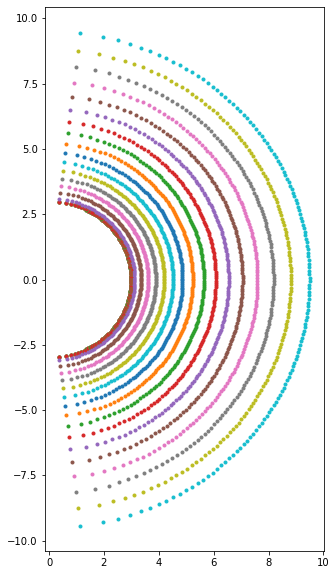

In [22]:
print(hdul_3Dd[0].data.shape)
plt.figure(figsize = (5, 10))
c = 1
for i in range(140):
    for j in range(1, 100, 5):
        plt.scatter(hdul_3Dd[0].data[0, 0, i, j], hdul_3Dd[0].data[1, 0, i, j], marker = '.')
plt.show()

I believe that the third axis, n_az = 1 corresponds to 2pi

#### Increase naz to 4

This results in 4 partitions azimuthally between 0 and 2 pi

In [32]:
default_3D_naz4 = "3D_default_naz_4/grid.fits.gz"
hdul_3Dd_naz4 = fits.open(default_3D_naz4)
data = hdul_3Dd_naz4[0].data[2,:,0,0]
print(data)

[1.57079637 3.14159274 4.71238899 6.28318548]


## If you pass in a density file, does it still create the dust in the parameter file

Both of these were made using ``density_values = density_files.full(1, 70, 100)``

Diff of the parameter files:

``$ diff 2D_density_file/star.para 2D_density_file_sde-2/star.para``
<br>
``50c50``
<br>
``<   -0.5  0.0    	          surface density exponent (or -gamma for tappered-edge disk or volume density for envelope), usually < 0, -gamma_exp (or alpha_in & alpha_out for debris disk)
``
<br>
``---``
<br>
``>   -2  0.0    	          surface density exponent (or -gamma for tappered-edge disk or volume density for envelope), usually < 0, -gamma_exp (or alpha_in & alpha_out for debris disk)``
<br>
``76c76``
<br>
``< Wed Aug 21 10:56:31 AEST 2019``
<br>
``---``
<br>
``> Wed Aug 21 11:00:08 AEST 2019``


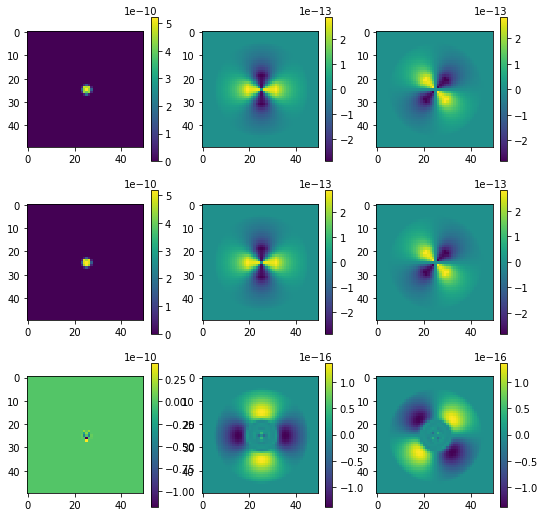

In [44]:
img1 = fits.open("2D_density_file/RT.fits")[0].data
img2 = fits.open("2D_density_file_sde-2/RT.fits")[0].data

normalise = False

if normalise:
    for i in range(3):
        img1[i][0][0] = img1[i][0][0]/np.max(img1[i][0][0])
        img2[i][0][0] = img2[i][0][0]/np.max(img2[i][0][0])

# set image boundaries
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

Running the 2D density file twice and comparing

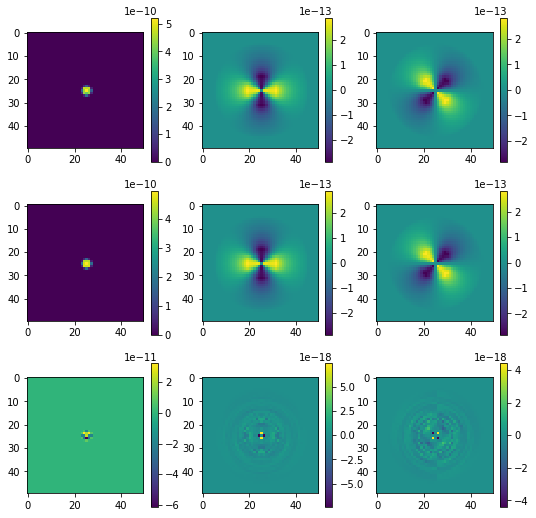

In [43]:
img1 = fits.open("2D_density_file/RT.fits")[0].data
img2 = fits.open("2D_density_file_repeat/RT.fits")[0].data

normalise = False

if normalise:
    for i in range(3):
        img1[i][0][0] = img1[i][0][0]/np.max(img1[i][0][0])
        img2[i][0][0] = img2[i][0][0]/np.max(img2[i][0][0])

# set image boundaries
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

I've tried to set read_n_a = 1, and there is no difference. Turns out you don't use the read_n_a flag unless ``n_grains > 1``

``hdul[0].header["read_n_a"] = 1``

For comparison, this is identical to the above examples without readna1.
``img1 = fits.open("2D_density_file_readna1/RT.fits")[0].data``
``img2 = fits.open("2D_density_file_readna1_sde-2/RT.fits")[0].data``

This correctly changes the flag.

``Reading grain sizes ...``
<br>
``read_n_a           1``

#### Comparing a default file, and using a grid full of ones.

(read_n_a = 0)

spoiler: they're different

``img1 = fits.open("2D_density_file/RT.fits")[0].data``
<br>
``img2= fits.open("2D_default/RT.fits")[0].data``

## Normalisation

The first set of images has an input density file of ones and the second has an input density of zeros.

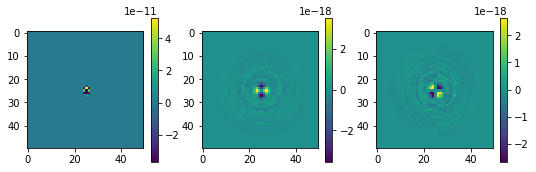

In [76]:
img1 = fits.open("2D_density_file_ones/RT.fits")[0].data
img2 = fits.open("2D_density_file_zeros/RT.fits")[0].data

x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## IT'S A MATCH (2D)

2D_density_file_r_pow has its density file created as in the next cell:

In [ ]:
#Note: hdul[0].header["read_n_a"] = 0

def r_power_grid():
    fn = "../make-measurements/grid.fits.gz"
    hdul = fits.open(fn)
    x = hdul[0].data[0,0,:,:]
    y = hdul[0].data[1,0,:,:]
    r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
    r = np.power(r, -0.5)# This is the surface density exponent
    r = np.expand_dims(r, axis=0)
    r = np.expand_dims(r, axis=0)
    return r

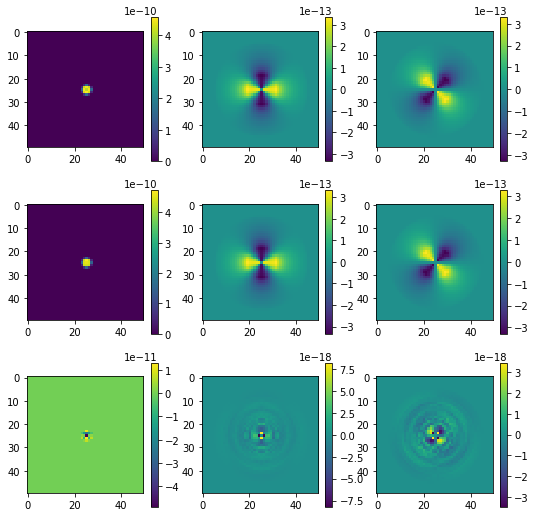

In [118]:
img1 = fits.open("2D_default/RT.fits")[0].data
img2 = fits.open("2D_density_file_r_pow/RT.fits")[0].data

x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## Change the surface density exponent to -2

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100, "surface_density_exponent": -2}``

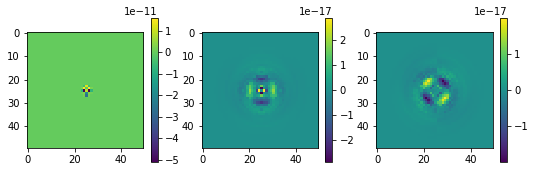

In [121]:
img1 = fits.open("2D_default_sde-2/RT.fits")[0].data
# rpg uses the r_power_grid function as above
img2 = fits.open("2D_density_file_rpg_sde-2/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## Repeat with 2 grains

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 2, "amin":50, "amax":100}``

In the next cells are the code for multiple grains.



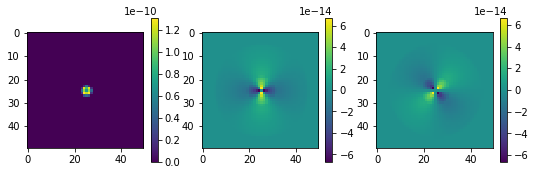

In [100]:
img1 = fits.open("2D_default/RT.fits")[0].data
img2 = fits.open("2D_default_ngrains2/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

2D_density_file_ngrains2_na1 and 2D_density_file_ngrains2_na0

``WARNING: Forcing variable dust``
<br>
``           1 grain sizes found``

It appears that we aren't using the ``read_n_a flag``

In [ ]:
density_values = density_files.r_power_grid()
grains = np.array([50, 100])
hdu1 = fits.PrimaryHDU(density_values)
hdu2 = fits.ImageHDU(grains)
hdul = fits.HDUList([hdu1, hdu2])
hdul[0].header["read_n_a"] = 1
hdul.writeto(mcfost_path + density_file, overwrite=True)

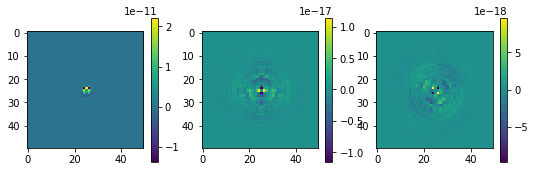

In [101]:
img1 = fits.open("2D_default_ngrains2/RT.fits")[0].data
img2 = fits.open("2D_density_file_ngrains2_na1/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

In [ ]:
density_values = density_files.r_power_grid()
grains = np.array([50, 100])
hdu1 = fits.PrimaryHDU(density_values)
hdu2 = fits.ImageHDU(grains)
hdul = fits.HDUList([hdu1, hdu2])
hdul[0].header["read_n_a"] = 0

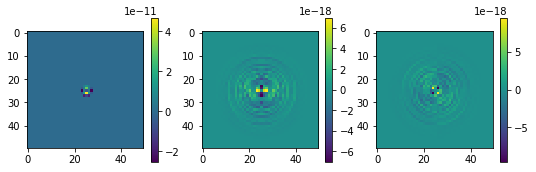

In [102]:
img1 = fits.open("2D_default_ngrains2/RT.fits")[0].data
img2 = fits.open("2D_density_file_ngrains2_na0/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

This following was made using: ``hdul = fits.HDUList([hdu1])``

It seems that you do need to give the dust grain sizes

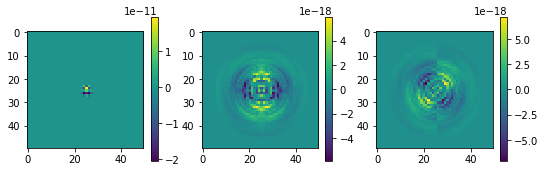

In [131]:
img1 = fits.open("2D_default_ngrains2/RT.fits")[0].data
img2 = fits.open("2D_density_file_ngrains2/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

2D_density_file_ngrains_large

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 2, "amin":50, "amax":100}``
<br>
``grains = np.array([500, 1000])``
<br>
``hdul = fits.HDUList([hdu1, hdu2])``

This doesn't match with:
- 2D_default_ngrains2
- 2D_density_file_ngrains2

This matches:
- 2D_density_file_ngrains2_na0
- 2D_density_file_ngrains2_na1

This confirms that the grains array still isn't doing anything

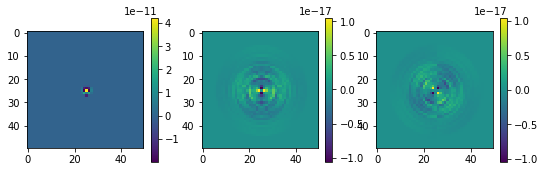

In [115]:
img1 = fits.open("2D_density_file_ngrains_large/RT.fits")[0].data
img2 = fits.open("2D_density_file_ngrains2_na1/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

In [ ]:
# still need to work out how to use the grains -> maybe they're only used for 3D?

## 3D density file shape



In [ ]:
def dim_3d():
                # ngrains, naz, 2 * n_theta, nrad
    ones = np.ones((1, 2, 140, 100))
    return ones
    
free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100, "n_az": 2}#, "surface_density_exponent": -2}

density_values = density_files.dim_3d()
grains = np.array([100])
hdu1 = fits.PrimaryHDU(density_values)
hdu2 = fits.ImageHDU(grains)

hdul = fits.HDUList([hdu1, hdu2])

hdul[0].header["read_n_a"] = 0

## How to combine the 3D axis

In [127]:
# Quick demo
x1 = [[1, 2], [3, 4]]
x2 = [[5, 6], [7, 8]]
x3 = [[9, 10], [11, 12]]

y1 = [[10, 20], [30, 40]]
y2 = [[100, 200], [300, 400]]
y3 = [[1000, 2000], [3000, 4000]]

x = [x1, x2, x3]
y = [y1, y2, y3]
r = [x, y]

print(R.shape)
R = np.array(r)
X = R[0,:,:,:]
Y = R[1,:,:,:]
print(X + Y)

# This should do exactly the same as with the 2D version and also keep all the radius values for the azimuthal angles separate

(2, 3, 2, 2)
[[[  11   22]
  [  33   44]]

 [[ 105  206]
  [ 307  408]]

 [[1009 2010]
  [3011 4012]]]


## 3D

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100, "n_az": 200}``

Using the default file, stored in:
``3D_default_naz_200``

In [ ]:
def grid_3d():
    fn = "../tests/grid_files/3D_default_ngrains2_naz4/grid.fits.gz"
    hdul = fits.open(fn)
    r = hdul[0].data[:,:,:,:]
    x = hdul[0].data[0,:,:,:]
    y = hdul[0].data[1,:,:,:]
    r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
    r = np.power(r, -0.5)
    r = np.expand_dims(r, axis=0)

    return r

density_values = density_files.grid_3d()
hdul[0].header["read_n_a"] = 0

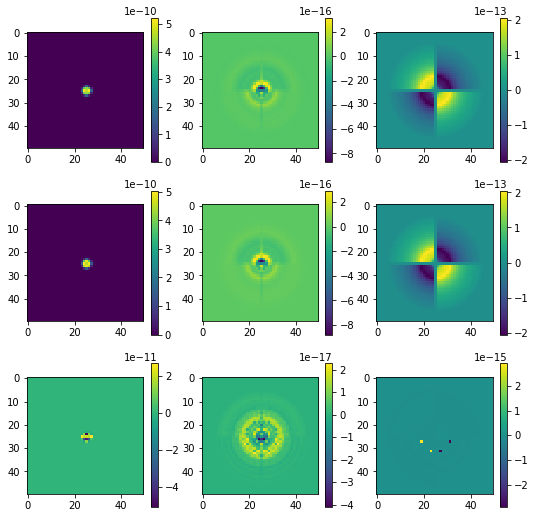

In [136]:
img1 = fits.open("3D_default_naz_200/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_4/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## 3D: changing n_az

This is using the parameter file
``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100, "n_az": 6}``

We change n_az

### Need to have enough az cells

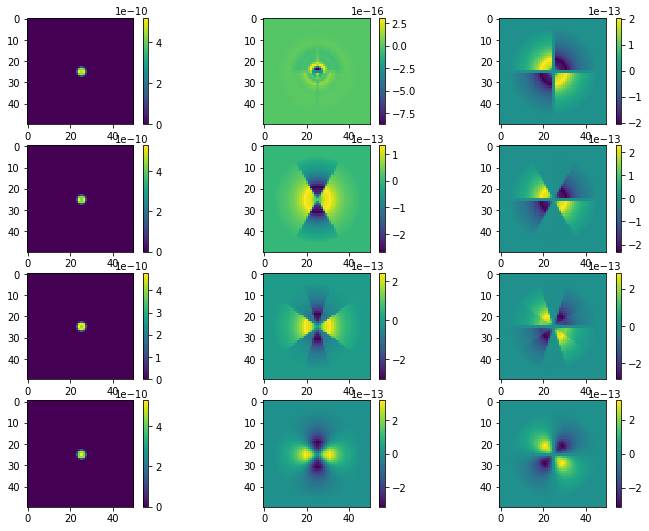

In [158]:
img1 = fits.open("3D_default_naz_4/RT.fits")[0].data
img2 = fits.open("3D_default_naz_6/RT.fits")[0].data
img3 = fits.open("3D_default_naz_10/RT.fits")[0].data
img4 = fits.open("3D_default_naz_100/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(4, 3, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(4, 3, i + 4)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(4, 3, i + 7)
    plt.imshow(img3[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(4, 3, i + 10)
    plt.imshow(img4[i][0][0][x1:x2, x1:x2])
    plt.colorbar()

## Investigate the 3D grid

  0%|          | 0/4 [00:00<?, ?it/s]

(3, 4, 140, 100)
n_grains, naz, 2* n_z, n_rad


100%|██████████| 4/4 [00:21<00:00,  5.48s/it]


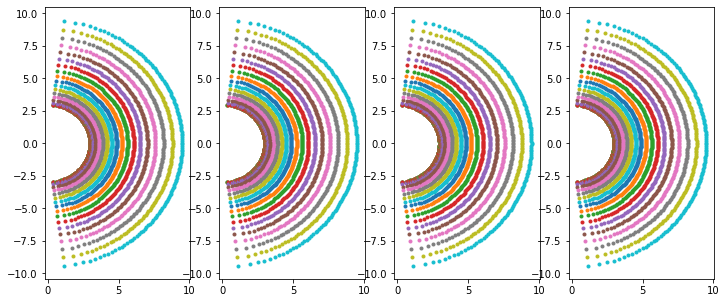

In [155]:
fn = "3D_default_naz_4/grid.fits.gz"
hdul = fits.open(fn)

print(hdul[0].data.shape)
print("n_grains, naz, 2* n_z, n_rad")
plt.figure(figsize = (12, 5))
c = 1
for k in tqdm(range(4)): # loop through azimuthal angle
    plt.subplot(1, 4, k + 1)
    for i in range(140): # n_z
        for j in range(1, 100, 5): # n_rad
            plt.scatter(hdul[0].data[0, k, i, j], hdul[0].data[1, k, i, j], marker = '.')
plt.show()


In [201]:
# to obtain the radius
r = hdul[0].data[:,:,:,:]
x = hdul[0].data[0,:,:,:]
y = hdul[0].data[1,:,:,:]
r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
print(r.shape)

(200, 140, 100)


In [ ]:
fn = "3D_default_naz_4/grid.fits.gz"
hdul = fits.open(fn)

print(hdul[0].data.shape)

## 2D vs 3D star with naz
``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 1, "amin":100, "amax":100, "n_az": 200}
``

``basic_cmd = ["mcfost", MCFOST_path + file_name]``
<br>
``grid_cmd = basic_cmd + ["-output_density_grid"]#, "-3D"]``
<br>
``rt_cmd = basic_cmd + ["-img", str(wavelength), "-rt"]``
<br>
``rt_cmd += ["-density_file", MCFOST_path + density_file]#, "-3D"]``

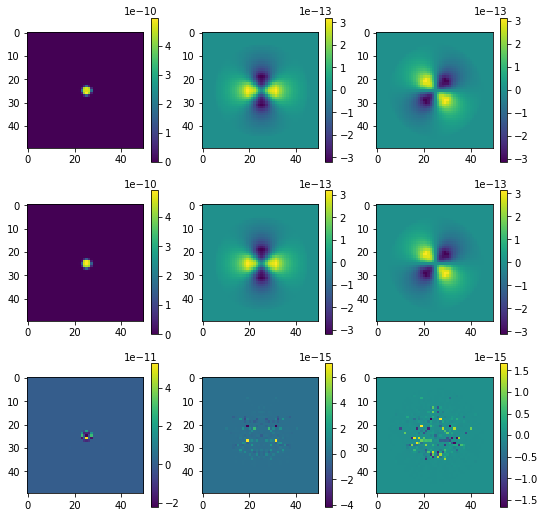

In [161]:
img1 = fits.open("2D_default_naz_200/RT.fits")[0].data
img2 = fits.open("3D_default_naz_200/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## 3D naz = 200

Reproducing a 3D grid with naz = 200 with a density file

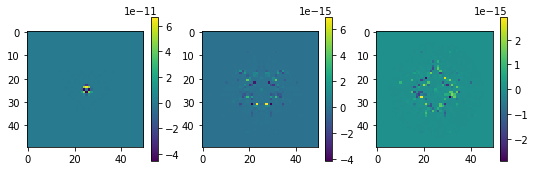

In [165]:
img1 = fits.open("3D_default_naz_200/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

In [ ]:
# the following was used to create the density file

def grid_3d():
    fn = "../tests/grid_files/3D_default_naz_200/grid.fits.gz"
    hdul = fits.open(fn)
    r = hdul[0].data[:,:,:,:]
    x = hdul[0].data[0,:,:,:]
    y = hdul[0].data[1,:,:,:]
    r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
    # r = hdul[0].data[0,0,:,:]
    # x = np.power(r, p)
    r = np.power(r, -0.5)
    r = np.expand_dims(r, axis=0)
    # r = np.array([r, r, r, r])
    return r

density_values = density_files.grid_3d()
hdu1 = fits.PrimaryHDU(density_values)
hdul = fits.HDUList([hdu1])
hdul[0].header["read_n_a"] = 0

## Changing the number of dust grains

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 5, "amin":50, "amax":250, "n_az": 200}``
``3D_default_naz_200_ngrains_5``

### Grid dimensions

In [197]:
fn = "3D_default_naz_200_ngrains_5/grid.fits.gz"
hdul = fits.open(fn)
print(hdul[0].shape)

(3, 200, 140, 100)


### grain sizes

In [193]:
np.geomspace(50, 250, 6)

array([ 50.        ,  68.98648307,  95.18269694, 131.32639022,
       181.19491592, 250.        ])

In [173]:
fn = "3D_default_naz_200_ngrains_5/grain_sizes.fits.gz"
hdul = fits.open(fn)
print(hdul[0].data)

[ 58.730946  81.03283  111.8034   154.25847  212.83499 ]


In [179]:
fn = "3D_default_naz_200_ngrains_5/grain_sizes_min.fits.gz"
hdul_min = fits.open(fn)
print(hdul_min[0].data)

[ 50.       68.98648  95.18269 131.32639 181.19493]


In [180]:
fn = "3D_default_naz_200_ngrains_5/grain_sizes_max.fits.gz"
hdul_max = fits.open(fn)
print(hdul_max[0].data)

[ 68.98648  95.18269 131.32639 181.19492 250.00002]


In [195]:
for i in range(5):
    min_grain = hdul_min[0].data[i]
    max_grain = hdul_max[0].data[i]
    middle = np.geomspace(min_grain, max_grain, 3)[1]
    print(middle)

58.730946149747425
81.03282697807542
111.80339483614405
154.25846284367057
212.83499600014954


### The bins are given above.
- grain_sizes_min: gives the minimum of the bin
- grain_sizes_max: gives the maximum of the bin
- grain_sizes: gives the middle of the bin (geometrically space)

In [176]:
fn = "3D_default_naz_200_ngrains_5/grain_masses.fits.gz"
hdul = fits.open(fn)
print(hdul[0].data)

[2.9700082e-06 7.8008097e-06 2.0489042e-05 5.3815045e-05 1.4134673e-04]


### Comparison with only 1 grain

Default file has 5 grains, but the density file has 5 grains

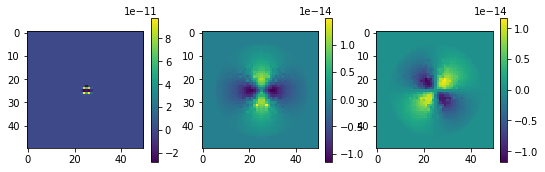

In [198]:
img1 = fits.open("3D_default_naz_200_ngrains_5/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## Comparison with a density file with 5 grains

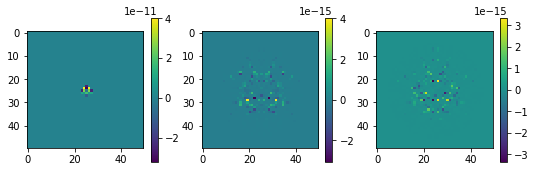

In [204]:
img1 = fits.open("3D_default_naz_200_ngrains_5/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200_ngrains_5/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

In [ ]:
# Code to specify the 5 grains
density_values = density_files.grid_3d()
hdu1 = fits.PrimaryHDU(density_values)

# load in the grain sizes -> use the middle of the bins
fn = "../tests/grid_files/3D_default_naz_200_ngrains_5/grain_sizes.fits.gz"
hdul_grains = fits.open(fn)
grains = hdul_grains[0].data
hdu2 = fits.ImageHDU(grains)

hdul = fits.HDUList([hdu1, hdu2])
hdul[0].header["read_n_a"] = 1
hdul.writeto(mcfost_path + density_file, overwrite=True)

I think that the above doesn't actually use ``hdul[0].header["read_n_a"] = 1``

In the logs:
``WARNING: Forcing variable dust``
<br>
           ``1 grain sizes found``

I think that by default, it reads the 5 grains in the density parameter file and applies the same distribution to all

This is because the dimensions of the density values is: (1, 200, 140, 100) (see grid_3D() earlier)

## explicitly specifying the distribution for each grain size

In [ ]:
def grid_3d():
    fn = "../tests/grid_files/3D_default_naz_200_ngrains_5/grid.fits.gz"
    hdul = fits.open(fn)
    r = hdul[0].data[:,:,:,:]
    x = hdul[0].data[0,:,:,:]
    y = hdul[0].data[1,:,:,:]
    r = np.power(np.power(x, 2) + np.power(y, 2), 0.5)
    r = np.power(r, -0.5)
    # r = np.expand_dims(r, axis=0) # This line makes the first dimension 1, so you only have 1 grain size
    r = np.array([r, r, r, r, r]) # This is where you give the grain sizes for each bin
    return r

### Relative grain density

A 3rd hdul is required to give the relative densities
I believe [1, 1, 1, 1, 1] will have an equal amount of each grain size

### Create a simple hdu

Getting the following mcfost error:

`` ERROR: cannot read bitpix in fits file``

To fix this error make at least one of the density values a float

``grain_density = [1.0, 1, 1, 1, 1]``

## Experiment with grain density

In [ ]:
density_values = density_files.grid_3d()

# load grain sizes
fn = "../tests/grid_files/3D_default_naz_200_ngrains_5/grain_sizes.fits.gz"
hdul_grains = fits.open(fn)
grains = hdul_grains[0].data

grain_mass = [1.0, 1, 1, 1, 2]

hdu1 = fits.PrimaryHDU(density_values)
hdu2 = fits.ImageHDU(grains)
hdu3 = fits.ImageHDU(grain_mass)

hdul = fits.HDUList([hdu1, hdu2, hdu3])

hdul[0].header["read_n_a"] = 1

hdul.writeto(mcfost_path + density_file, overwrite=True)

#### MCFOST log output

WARNING: Forcing variable dust
           5 grain sizes found
 Dust density range:  0.3174050      0.5773503    
 Reading grain sizes ...
 read_n_a           1
 Reading grain size distribution ...
 The following grain sizes were found in the fits file:
 
           1   58.73095     microns, relative number density =  0.1666667    
           2   81.03283     microns, relative number density =  0.1666667    
           3   111.8034     microns, relative number density =  0.1666667    
           4   154.2585     microns, relative number density =  0.1666667    
           5   212.8350     microns, relative number density =  0.3333333    

#### compare with default file

- grain_masses: same
- dust_mass_density: same
- gas_density: same

In [270]:
# Compare with default file
file = "dust_mass_density.fits.gz"

fn = "3D_default_naz_200_ngrains_5/{}".format(file)
default = fits.open(fn)

fn = "3D_density_file_grain_density_expt/{}".format(file)
density_file = fits.open(fn)

print(np.array_equal(default[0].data, density_file[0].data))
# print(default[0].data)
# print(density_file[0].data)

True


## Comparison  with a density file with 5 grains using specified grain densities

### Example 1: not a match because the grain masses are wrong
This is using equal grain masses for each grain size

 read_n_a           1
 Reading grain size distribution ...
 The following grain sizes were found in the fits file:
 
           1   58.73095     microns, relative number density =  0.2000000    
           2   81.03283     microns, relative number density =  0.2000000    
           3   111.8034     microns, relative number density =  0.2000000    
           4   154.2585     microns, relative number density =  0.2000000    
           5   212.8350     microns, relative number density =  0.2000000 

In [240]:
grain_density = [1.0, 1, 1, 1, 1]
hdu3 = fits.ImageHDU(grain_density)
hdul = fits.HDUList([hdu1, hdu2, hdu3])

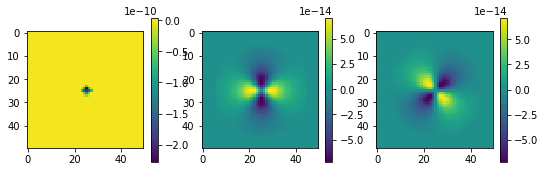

In [274]:
img1 = fits.open("3D_default_naz_200_ngrains_5/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200_ngrains_5_grain_density/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

### Example 2
This is using equal grain masses for each grain size

 read_n_a           1
 Reading grain size distribution ...
 The following grain sizes were found in the fits file:
 
           1   58.73095     microns, relative number density =  1.3117157E-02
           2   81.03283     microns, relative number density =  3.4452580E-02
           3   111.8034     microns, relative number density =  9.0490654E-02
           4   154.2585     microns, relative number density =  0.2376762    
           5   212.8350     microns, relative number density =  0.6242633  

In [ ]:
density_values = density_files.grid_3d()
print(density_values.shape)

# load grain sizes
fn = "../tests/grid_files/3D_default_naz_200_ngrains_5/grain_sizes.fits.gz"
hdul_grains = fits.open(fn)
grains = hdul_grains[0].data

# load grain masses 
fn = "../tests/grid_files/3D_default_naz_200_ngrains_5/grain_masses.fits.gz"
hdul_grain_mass = fits.open(fn)
grain_mass = hdul_grain_mass[0].data

hdu1 = fits.PrimaryHDU(density_values)
hdu2 = fits.ImageHDU(grains)
hdu3 = fits.ImageHDU(grain_mass)

hdul = fits.HDUList([hdu1, hdu2, hdu3])
hdul[0].header["read_n_a"] = 1
hdul.writeto(mcfost_path + density_file, overwrite=True)

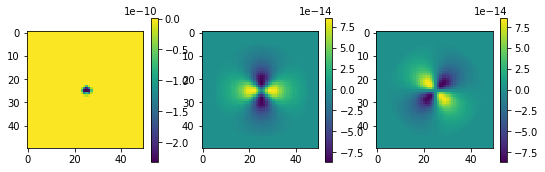

In [275]:
img1 = fits.open("3D_default_naz_200_ngrains_5/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200_ngrains_5_grain_masses/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

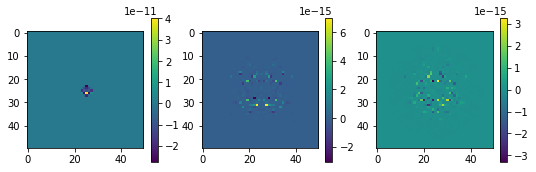

In [282]:
img1 = fits.open("3D_default_naz_200_ngrains_5/RT.fits")[0].data
img2 = fits.open("test/RT.fits")[0].data
x1 = 475
x2 = 525

plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## Final check

Integrating density file into ``run_MCFUST.py``

``free_params = {"nbr_photons_image":1.28e8, "Rout" : 10, "n_grains": 6, "amin":50, "amax":250, "n_az":200, "asp":2}``

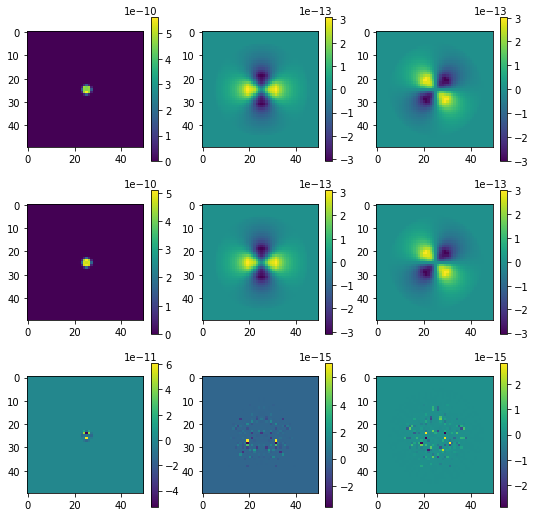

In [284]:
img1 = fits.open("3D_default_naz_200_ngrains_6/RT.fits")[0].data
img2 = fits.open("3D_density_file_naz_200_n_grains_6/RT.fits")[0].data
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img1[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 5)
    plt.imshow(img2[i][0][0][x1:x2, x1:x2])
    plt.colorbar()
for i in range(3):
    plt.subplot(3, 4, i + 9)
    plt.imshow((img1[i][0][0] - img2[i][0][0])[x1:x2, x1:x2])
    plt.colorbar()

## Attempting to use mcfosts automatic scaling

spoiler: i cant get it to work...

  0%|          | 0/3 [00:00<?, ?it/s]

(3, 200, 140, 100)
n_grains, naz, 2* n_z, n_rad


100%|██████████| 3/3 [00:14<00:00,  4.95s/it]


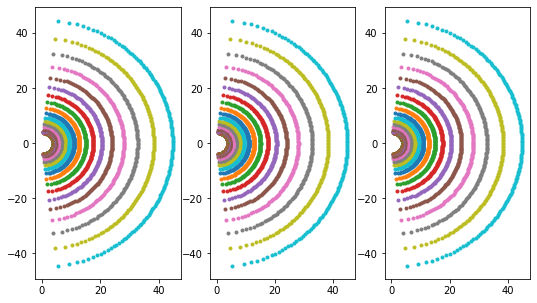

In [290]:
fn = "z_scale_0.5/grid.fits.gz"
hdul = fits.open(fn)

print(hdul[0].data.shape)
print("n_grains, naz, 2* n_z, n_rad")
plt.figure(figsize = (12, 5))
c = 1
for k in tqdm([0, 50, 100]): # loop through azimuthal angle
    plt.subplot(1, 4, c + 1)
    for i in range(140): # n_z
        for j in range(1, 100, 5): # n_rad
            plt.scatter(hdul[0].data[0, k, i, j], hdul[0].data[1, k, i, j], marker = '.')
    c += 1
plt.show()

(3, 8, 140, 100)
n_grains, naz, 2* n_z, n_rad
0.7853981852531433
0.7853981852531433
1.5707963705062866
1.5707963705062866
2.356194496154785
2.356194496154785
3.1415927410125732
3.1415927410125732
3.9269909858703613
3.9269909858703613
4.71238899230957
4.71238899230957
5.4977874755859375
5.4977874755859375
6.2831854820251465
6.2831854820251465


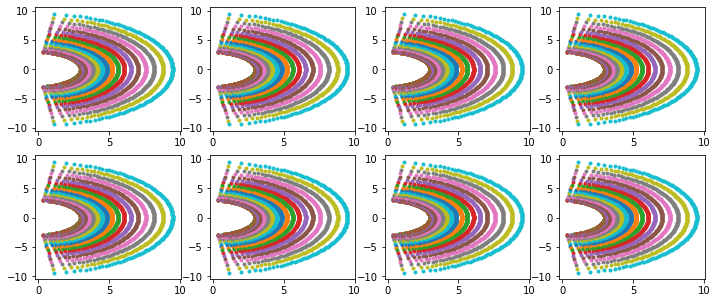

In [297]:
fn = "3D_default_naz_8/grid.fits.gz"
hdul = fits.open(fn)

print(hdul[0].data.shape)
print("n_grains, naz, 2* n_z, n_rad")
plt.figure(figsize = (12, 5))
c = 1
for k in range(8): # loop through azimuthal angle
    plt.subplot(2, 4, k + 1)
    for i in range(140): # n_z
        for j in range(1, 100, 5): # n_rad
            plt.scatter(hdul[0].data[0, k, i, j], hdul[0].data[1, k, i, j], marker = '.')
    print(np.min(hdul[0].data[2, k, :, :]))
    print(np.max(hdul[0].data[2, k, :, :]))
plt.show()

(3, 8, 140, 100)
n_grains, naz, 2* n_z, n_rad
0.7853981852531433
0.7853981852531433


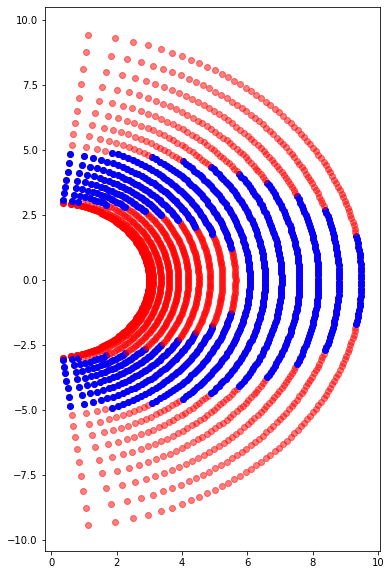

In [314]:
fn = "3D_default_naz_8/grid.fits.gz"
hdul = fits.open(fn)

asp = 0.5

c = 3
a = c/asp
b = c/asp

A = 10
B = 10
C = A * asp


print(hdul[0].data.shape)
print("n_grains, naz, 2* n_z, n_rad")
plt.figure(figsize = (6, 10))

for k in range(1): # loop through azimuthal angle
    plt.subplot(1, 1, k + 1)
    for i in range(140): # n_z
        for j in range(1, 100, 5): # n_rad
            r = hdul[0].data[0, k, i, j]
            z = hdul[0].data[1, k, i, j]
            theta = hdul[0].data[2, k, i, j]
            
            x = r * abs(np.cos(theta))
            y = r * abs(np.sin(theta))
            
            inner = pow(x/a, 2) + pow(y/b, 2) + pow(z/c, 2)
            outer = pow(x/A, 2) + pow(y/B, 2) + pow(z/C, 2)
            
            plt.scatter(r, z, marker = 'o', alpha = 0.5, c='red') 
            if inner > 1 and outer < 1:
                plt.scatter(r, z, marker = 'o', alpha = 1, c='blue')
               
    print(np.min(hdul[0].data[2, k, :, :]))
    print(np.max(hdul[0].data[2, k, :, :]))
plt.show()

rx 0.75
Rin 3.0
Rout 30.0
Rz 120.0


(8, 140, 100)
(8, 140, 100)


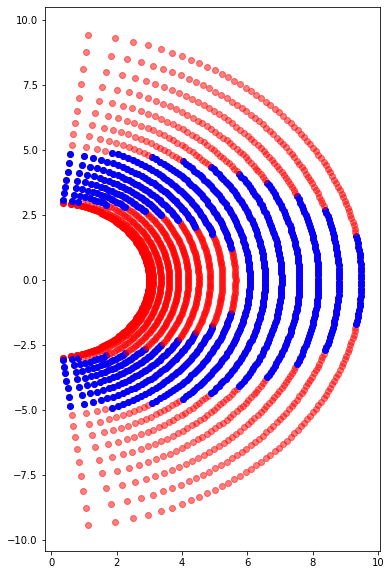

In [363]:
fn = "3D_default_naz_8/grid.fits.gz"
hdul_grid = fits.open(fn)
r = hdul_grid[0].data[0,:,:,:]
z = hdul_grid[0].data[1,:,:,:]
theta = hdul_grid[0].data[2,:,:,:]

x =  r * abs(np.cos(theta))
y =  r * abs(np.sin(theta))

print(x.shape)
print(y.shape)

# r = np.power(np.power(r, 2) + np.power(z, 2), 0.5)

Rin = 3.0 # Rin: inner semi-minor axis (z)
Rout = 30.0 # Rout : outer semi-major axis (x, y)

rx = 0.75 # rx: inner semi-major axis (x, y)
Rz = 120 # Rz: outer semi-minor axis (z)

Rin = 3 # Rin: inner semi-minor axis (z)
Rout = 10 # Rout : outer semi-major axis (x, y)

rx = 6 # rx: inner semi-major axis (x, y)
Rz = 5 # Rz: outer semi-minor axis (z)

plt.figure(figsize = (6, 10))

for i in range(140):
    for j in range(1, 100, 5):
        inner = pow(x/rx, 2) + pow(y/rx, 2) + pow(z/Rin, 2)
        outer = pow(x/Rout, 2) + pow(y/Rout, 2) + pow(z/Rz, 2)
        
        plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 0.5, c='red') 
        if inner[0, i, j] > 1 and outer[0, i, j] < 1:
            plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 1, c='blue')

inner = np.add(np.add(np.power(x/rx, 2), np.power(y/rx, 2)), np.power(z/Rin, 2))
outer = np.add(np.add(np.power(x/Rout, 2), np.power(y/Rout, 2)), np.power(z/Rz, 2))

mask = np.invert(np.add(inner < 1, outer > 1))




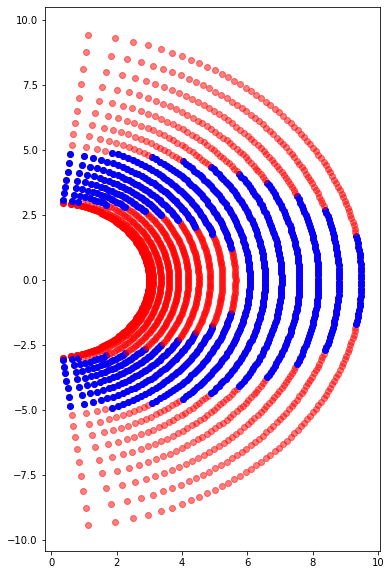

In [366]:
fn = "3D_default_naz_8/grid.fits.gz"
hdul_grid = fits.open(fn)
r = hdul_grid[0].data[0,:,:,:]
z = hdul_grid[0].data[1,:,:,:]
theta = hdul_grid[0].data[2,:,:,:]

x =  r * abs(np.cos(theta))
y =  r * abs(np.sin(theta))

# r = np.power(np.power(r, 2) + np.power(z, 2), 0.5)

Rin = 3 # Rin: inner semi-minor axis (z)
Rout = 10 # Rout : outer semi-major axis (x, y)

rx = 6 # rx: inner semi-major axis (x, y)
Rz = 5 # Rz: outer semi-minor axis (z)


inner = np.add(np.add(np.power(x/rx, 2), np.power(y/rx, 2)), np.power(z/Rin, 2))
outer = np.add(np.add(np.power(x/Rout, 2), np.power(y/Rout, 2)), np.power(z/Rz, 2))


plt.figure(figsize = (6, 10))

for i in range(140):
    for j in range(1, 100, 5):
        
        plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 0.5, c='red') 
        if inner[0, i, j] > 1 and outer[0, i, j] < 1:
            plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 1, c='blue')


mask = np.invert(np.add(inner < 1, outer > 1))



In [367]:
asp = "RT.fits"
asp = fits.open(asp)

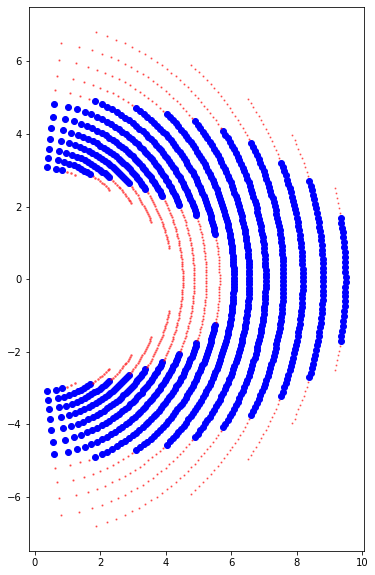

In [406]:
fn = "density.fits"
hdul = fits.open(fn)
density = hdul[0].data

fn = "3D_default_naz_8/grid.fits.gz"
hdul_grid = fits.open(fn)
r = hdul_grid[0].data[0,:,:,:]
z = hdul_grid[0].data[1,:,:,:]
theta = hdul_grid[0].data[2,:,:,:]

x =  r * abs(np.cos(theta))
y =  r * abs(np.sin(theta))

# r = np.power(np.power(r, 2) + np.power(z, 2), 0.5)

Rin = 3 # Rin: inner semi-minor axis (z)
Rout = 10 # Rout : outer semi-major axis (x, y)

rx = 6 # rx: inner semi-major axis (x, y)
Rz = 5 # Rz: outer semi-minor axis (z)

inner = np.add(np.add(np.power(x/rx, 2), np.power(y/rx, 2)), np.power(z/Rin, 2))
outer = np.add(np.add(np.power(x/Rout, 2), np.power(y/Rout, 2)), np.power(z/Rz, 2))

plt.figure(figsize = (6, 10))

for i in range(140):
    for j in range(1, 100, 5):
        
        plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 0.5, c ='red', s = 5*density[0,0,i, j]) 
        if inner[0, i, j] > 1 and outer[0, i, j] < 1:
            plt.scatter(r[0, i, j], z[0, i, j], marker = 'o', alpha = 1, c='blue')


# Make a dust pimple

(8, 140, 100)


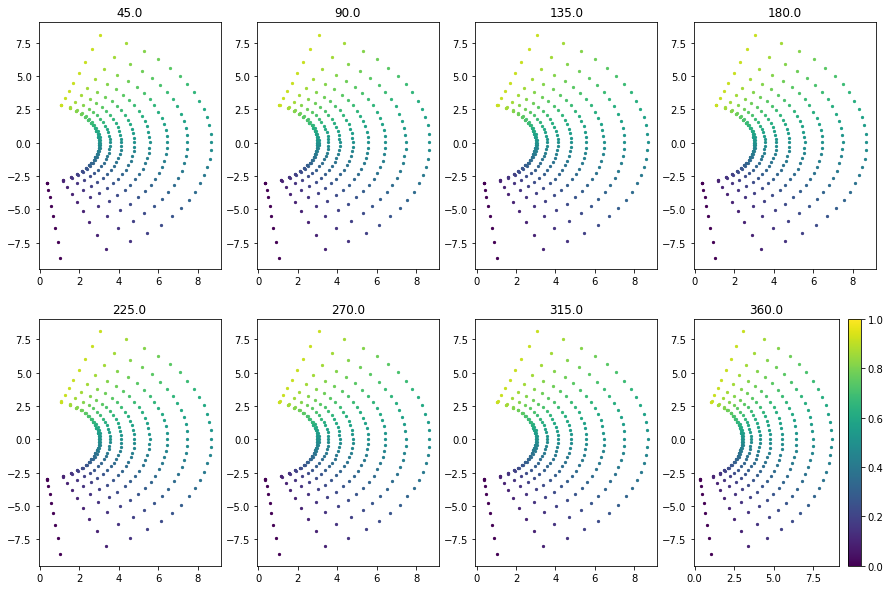

In [619]:
# Working out the distance of each cell from the center of the pimple
warnings.filterwarnings('ignore')

# location of the 'dust pimple'
theta_point = np.pi/4 # 45 degrees
phi_point = np.pi   # 90 degrees

# coordinates
fn = "3D_default_naz_8/grid.fits.gz"
hdul_grid = fits.open(fn)
r = hdul_grid[0].data[0,:,:,:]
z = hdul_grid[0].data[1,:,:,:]
theta = hdul_grid[0].data[2,:,:,:]

# make a distance grid
# calculate the angle phi
phi = np.arctan(r/z)
z_mask = np.pi * (z < 0).astype(int)
phi += z_mask
# print(np.degrees(phi[0, :,1]))

cos_psi = np.sin(phi_point) * np.sin(phi) * np.cos(theta_point - theta) + np.cos(phi_point) * np.cos(phi)
psi = np.arccos(cos_psi)
print(psi.shape)

# visualise the distances 
# the colour shows you the distance from the center of the pimple
# '1' is the furthest away
cmap = cm.viridis
norm = Normalize(vmin=psi.min(), vmax=psi.max())
bar_colour = cmap(norm(psi))

plt.figure(figsize = (15, 10))
c = 1
for i in tqdm(range(8)): # loop through azimuthal angle
    ax = plt.subplot(2, 4, c)
    for j in range(0, 140, 5): # n_z
        for k in range(0, 100, 10): # n_rad
            plt.scatter(hdul_grid[0].data[0, i, j, k], hdul_grid[0].data[1, i, j, k], marker = '.', c = [bar_colour[i, j, k, :]], s = 20)
    ax.title.set_text('{0:.1f}'.format(np.degrees(theta[i, 0, 0])))
    c += 1
plt.colorbar()
plt.show()


In [575]:
# make an array with the gaussian scaling factor
sigma = 0.1
amp = -1

# requires the phi from the previous cell
exponent = -np.power(psi, 2) / (2 * sigma)
gaussian = amp * np.exp(exponent) + 1

print(gaussian.shape)

(8, 140, 100)


In [547]:
fn = "3D_default_naz_8/grid.fits.gz"
hdul_grid = fits.open(fn)
r = hdul_grid[0].data[0,:,:,:]
z = hdul_grid[0].data[1,:,:,:]
theta = hdul_grid[0].data[2,:,:,:]

# example of a simple density grid
x =  r * abs(np.cos(theta))
y =  r * abs(np.sin(theta))

r = np.power(np.power(r, 2) + np.power(z, 2), 0.5)
r = np.power(r, -0.5)

r = np.expand_dims(r, axis=0)

print(r.shape)

(1, 8, 140, 100)


In [548]:
new_density = np.multiply(gaussian, r)
print(np.max(new_density))

0.5773502660976632


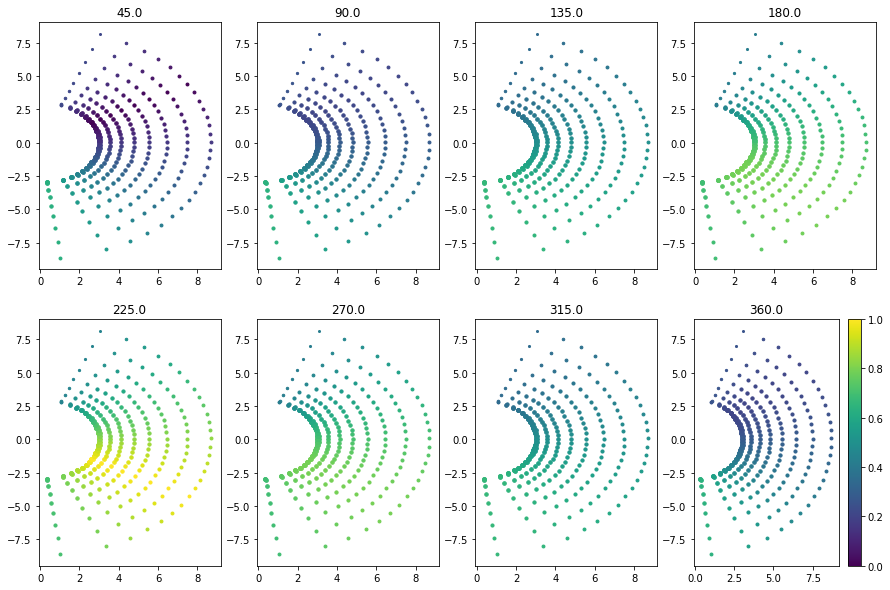

In [549]:
# visualise the distances 
# the colour shows you the distance from the center of the pimple
# '1' is the furthest away
cmap = cm.viridis
norm = Normalize(vmin=psi.min(), vmax=psi.max())
bar_colour = cmap(norm(psi))

plt.figure(figsize = (15, 10))
c = 1
for i in tqdm(range(8)): # loop through azimuthal angle
    ax = plt.subplot(2, 4, c)
    for j in range(0, 140, 5): # n_z
        for k in range(0, 100, 10): # n_rad
            plt.scatter(hdul_grid[0].data[0, i, j, k], hdul_grid[0].data[1, i, j, k], marker = '.', c = [bar_colour[i, j, k, :]], s = 100 * new_density[0, i, j, k])
    ax.title.set_text('{0:.1f}'.format(np.degrees(theta[i, 0, 0])))
    c += 1
plt.colorbar()
plt.show()

## Spot width

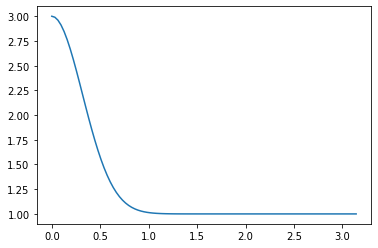

In [584]:
# make an array with the gaussian scaling factor
sigma = 0.1
amp = 2

# requires the phi from the previous cell
psi = np.linspace(0, np.pi, 100)
exponent = -np.power(psi, 2) / (2 * sigma)

gaussian = amp * np.exp(exponent) + 1

plt.figure()
plt.plot(psi, gaussian)

## Spot default

``free_params = {"nbr_photons_image":1.28e8,
               "Rin": 3,
               "Rout" : 30,
               "n_grains": 6,
               "amin":50,
               "amax":250,
               "n_az":200,
               "asp":0.5,
               "imin":0,
               "imax":90,
               "n_incl":3}``

In [563]:
def extract_img(directory):
    img = fits.open("{}/RT.fits".format(directory))[0].data
    I = img[0, :, :, :, :]
    Q = img[1, :, :, :, :]
    U = img[2, :, :, :, :]
    V = img[3, :, :, :, :]
    P = np.divide(np.power(np.power(Q, 2) + np.power(U, 2) + np.power(V, 2), 0.5),I)

    imgs = [('I', I), ('Q', Q), ('U', U), ('P', P)]
    return imgs
    

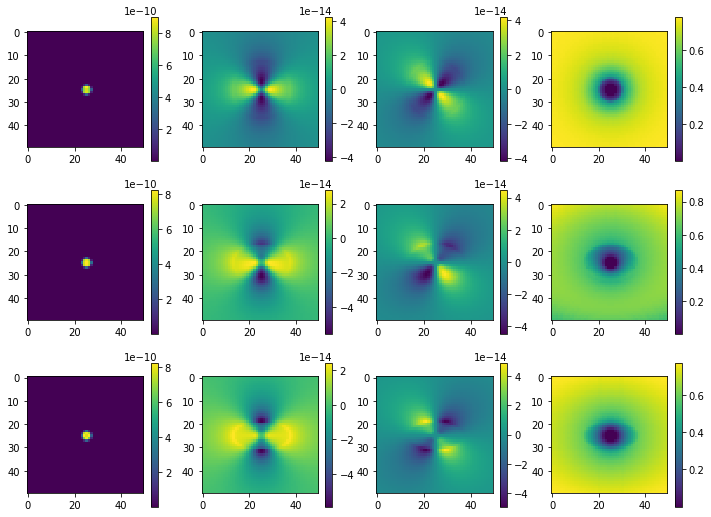

In [564]:
imgs = extract_img("spot_default")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img = imgs[j][1]
        plt.imshow(img[0][i][x1:x2, x1:x2])
        plt.colorbar()

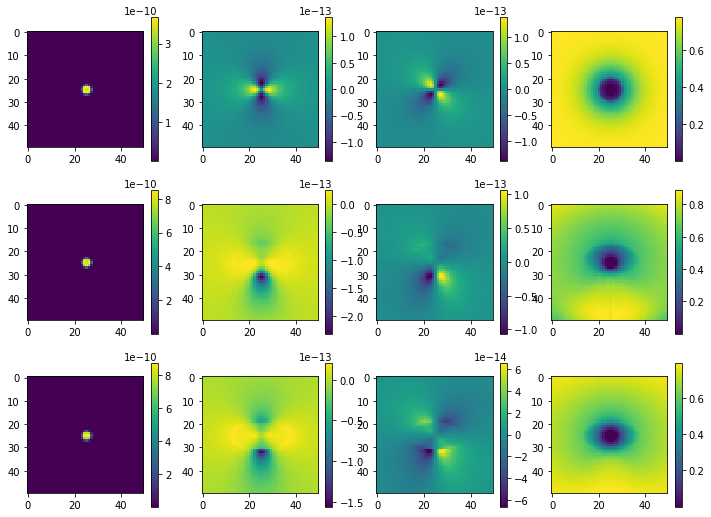

In [587]:
imgs = extract_img("spot_1")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img = imgs[j][1]
        plt.imshow(img[0][i][x1:x2, x1:x2])
        plt.colorbar()

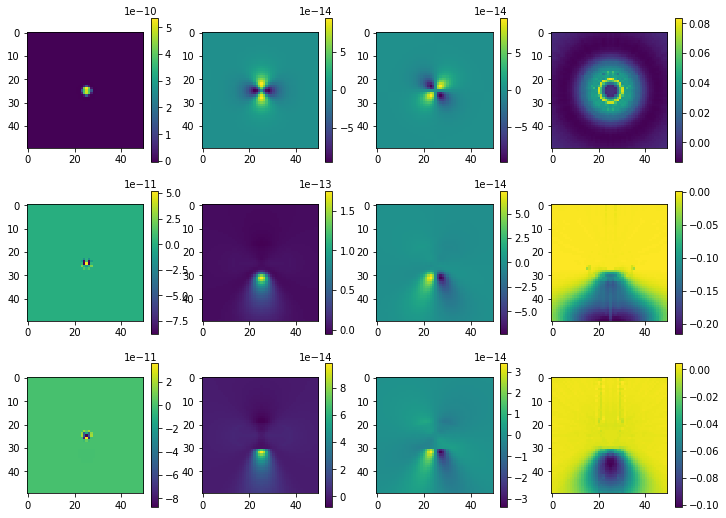

In [589]:
# spot1 = (10, 0.1, 0, 0) #amp, sigma, theta, phi (degrees)
imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_1")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar()

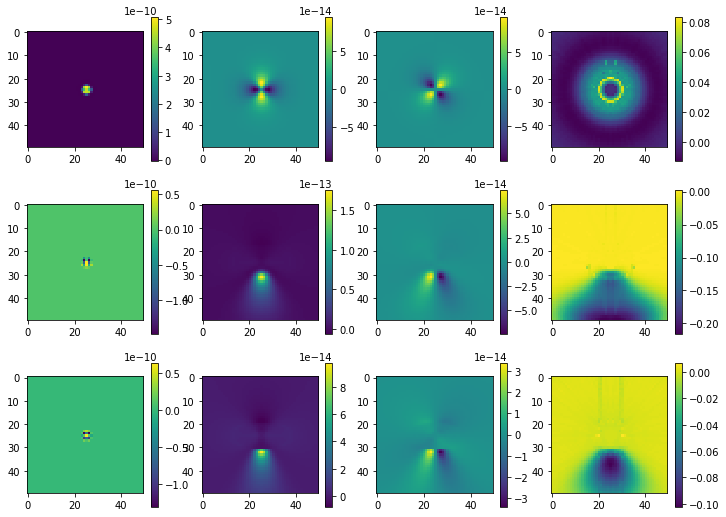

In [590]:
#spot2 = (10, 0.1, 90, 0) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_2")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar()

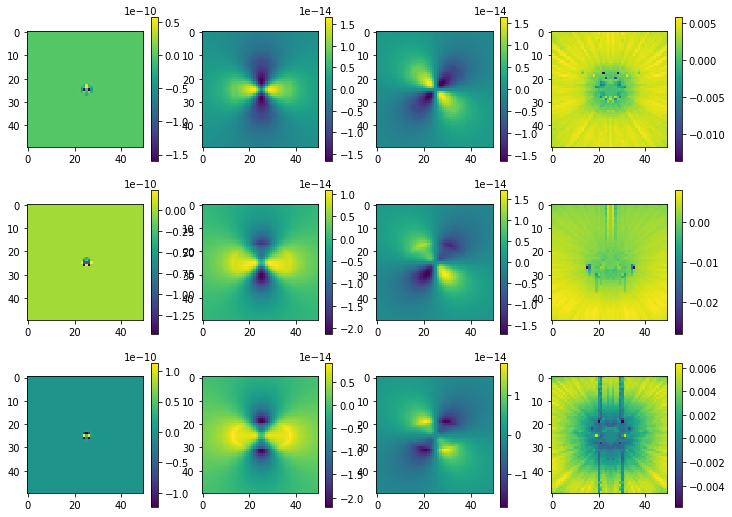

In [594]:
#spot3 = (10, 0.1, 0, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_3")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)


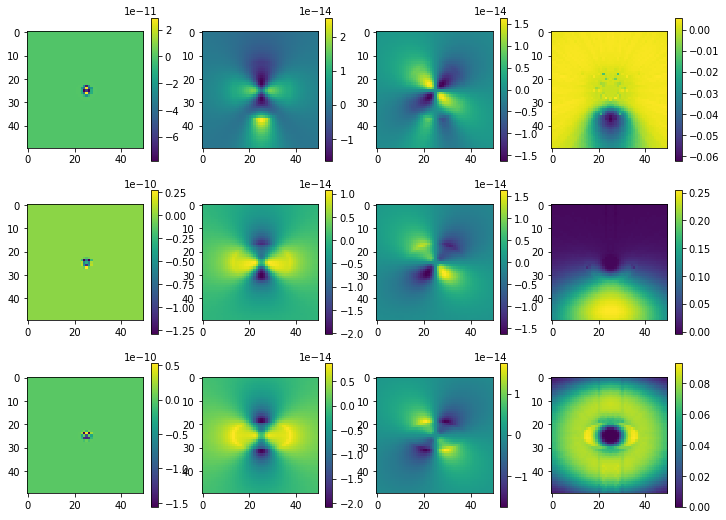

In [596]:
#spot4 = (10, 0.1, 90, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_4")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

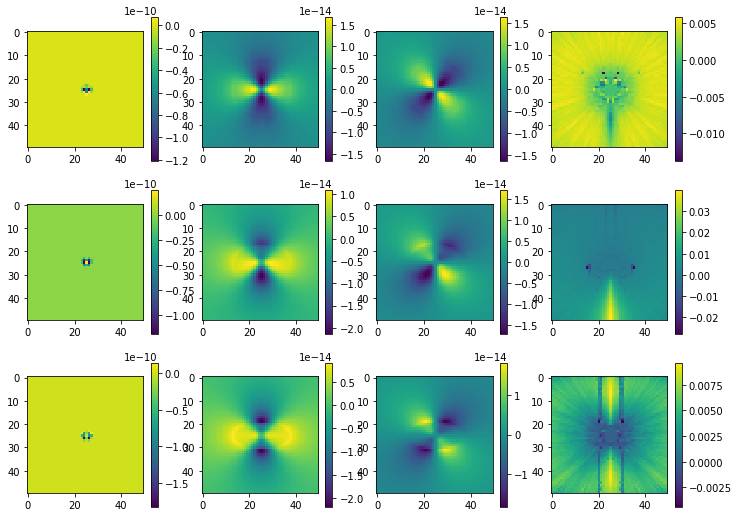

In [598]:
#spot5 = (10, 0.1, 45, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_5")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

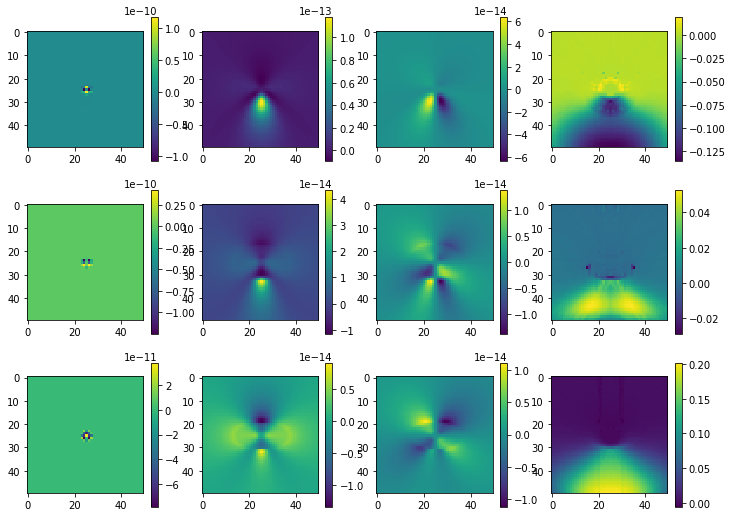

In [599]:
#spot6 = spot1 = (10, 0.1, 90, 45) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_6")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

In [600]:
956.717264175415
940.9606709480286
920.8045151233673

920.8045151233673

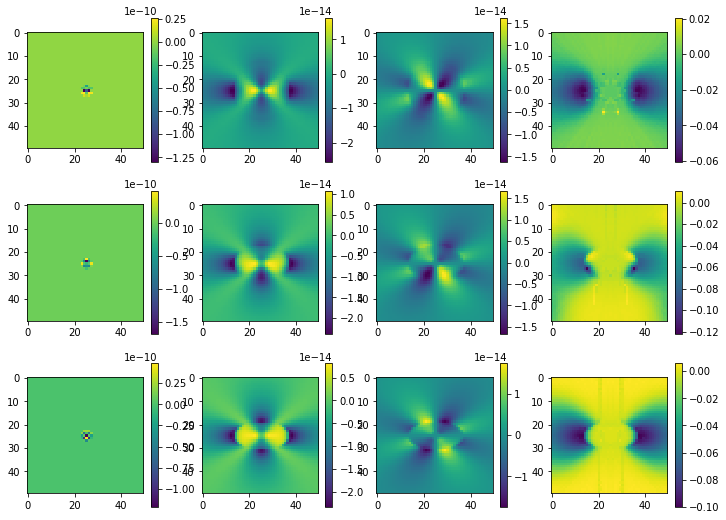

In [601]:
#spot7 = spot1 = (10, 0.1, 180, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_7")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

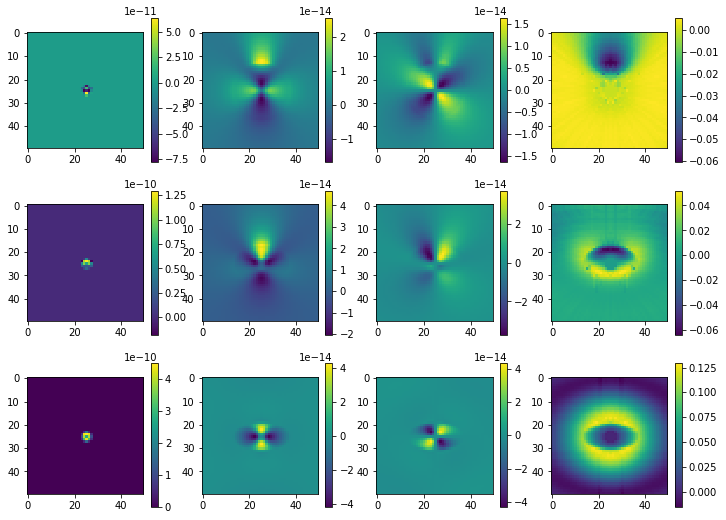

In [622]:
#spot8 = spot1 = (10, 0.1, 180, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_8")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

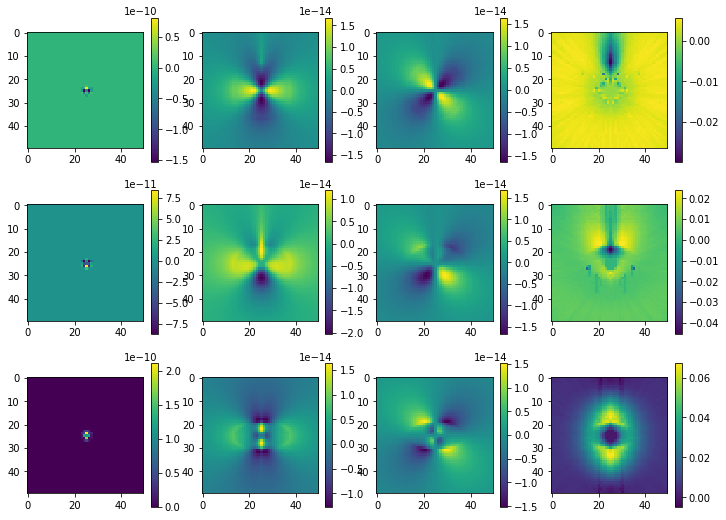

In [623]:
#spot9  =  (10, 0.1, 300, 90) #amp, sigma, theta, phi (degrees)

imgs1 = extract_img("spot_default")
imgs2 = extract_img("spot_9")
angles = ['0', '45', '90']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,9))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        img1 = imgs1[j][1]
        img2 = imgs2[j][1]
        plt.imshow(img1[0][i][x1:x2, x1:x2] - img2[0][i][x1:x2, x1:x2])
        plt.colorbar() #amp, sigma, theta, phi (degrees)

In [624]:
795.8500752449036
808.7146849632263
807.1969616413116

795.8500752449036

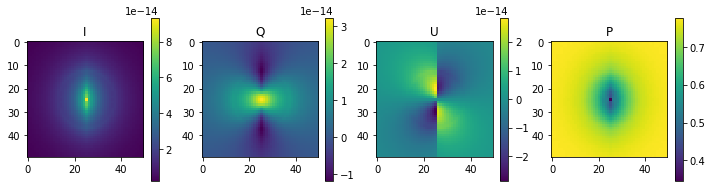

In [637]:
# the following three (x, y, z) are made at in= 0 
imgs = extract_img("x3")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()

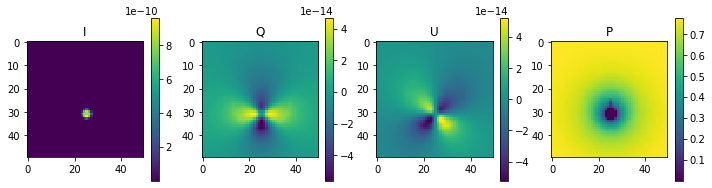

In [638]:
imgs = extract_img("y3")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()

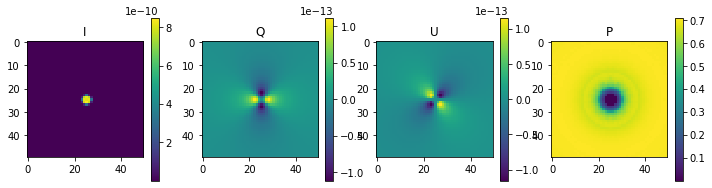

In [639]:
imgs = extract_img("z3")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()

In [ ]:
# following made at an offset of 2
and inc = 90

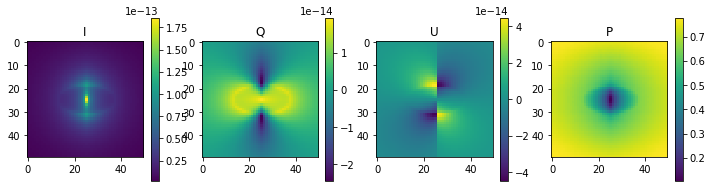

In [641]:
imgs = extract_img("x2")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()

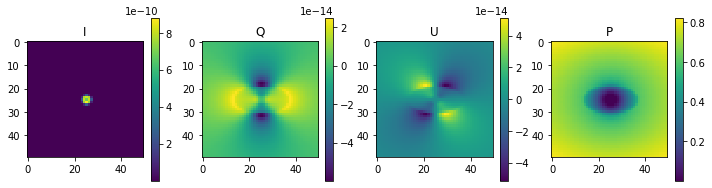

In [642]:
imgs = extract_img("y2")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()

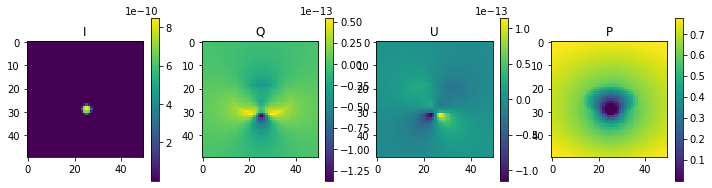

In [640]:
imgs = extract_img("z2")
angles = ['0']
    
x1 = 475
x2 = 525
plt.figure(figsize=(12,3))
for j in range(4):
    plt.subplot(1, 4, j + 1)
    img = imgs[j][1]
    plt.imshow(img[0][0][x1:x2, x1:x2])
    plt.title(imgs[j][0])
    plt.colorbar()